# Clasificacion
## Modelo Lineal (MCO)

In [9]:
import pandas as pd
import numpy as np

In [10]:
df =pd.read_excel('Datos.xlsx', index_col='Nombre')

In [11]:
df.head()

,X1,X2,Y
Nombre,,,
Luis,400,20,0
Francisco,450,35,0
Maria,500,25,0
Alvaro,600,15,0
Soledad,600,30,0


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
# Particion de los datos entre entrenamiento y prueba
# los datos x1,x2,y
X = df[['X1','X2']]
Y = df['Y']
np.random.seed(1234)
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

In [21]:
X_train

,X1,X2
Nombre,,
Soledad,600,30
Luis,400,20
Stella,550,45
Rocio,1050,60
Johanna,900,40
Sonia,1200,50
Esteban,700,35
Pedro,750,70
Juan,1000,40


In [23]:
# crear el modelo y entrenarlo
# todo los parametros quedan por defecto
reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
# 
y_pred1 = reg.predict(X_test)

In [26]:
y_pred1

array([0.25242303, 0.69050522, 0.08643439, 0.04108546, 0.17405082,
       1.07399425, 0.25550444])

In [27]:
# redondear
y_pred = np.rint(y_pred1)

In [29]:
y_pred

array([0., 1., 0., 0., 0., 1., 0.])

In [31]:
accuracy_score(y_test,y_pred)

1.0

In [32]:
reg.coef_

array([0.00084535, 0.0129884 ])

In [33]:
reg.intercept_

-0.6609506233540565

In [34]:
# matriz de confusion
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[5, 0],
       [0, 2]], dtype=int64)

# K vecinos mas cercanos (KNN)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
# instanciar el modelo y entrenarlo
vec = KNeighborsClassifier(n_neighbors=3)
vec.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [40]:
y_pred = vec.predict(X_test)

In [41]:
accuracy_score(y_test,y_pred)

0.5714285714285714

In [42]:
confusion_matrix(y_test,y_pred)

array([[3, 2],
       [1, 1]], dtype=int64)

In [43]:
k = range(2,15)
acc = []
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    acc.append(accuracy_score(y_test,pred))

In [44]:
acc

[0.8571428571428571,
 0.5714285714285714,
 0.7142857142857143,
 0.8571428571428571,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.5714285714285714,
 0.5714285714285714,
 0.2857142857142857,
 0.7142857142857143,
 0.2857142857142857,
 0.2857142857142857]

In [47]:
import matplotlib.pyplot as plt

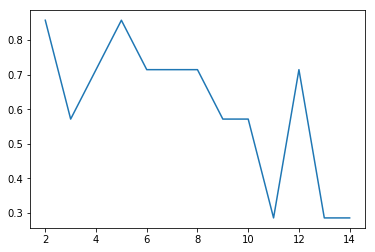

In [48]:
plt.plot(k,acc)

In [59]:
## ejercicio
from sklearn import datasets
iris = datasets.load_iris()
iris.feature_names
X=iris.data
Y=iris.target
from sklearn.model_selection import train_test_split
np.random.seed(1234)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k = range(2,15)
acc = []
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred = knn.predict(X_test)
    acc.append(accuracy_score(Y_test,pred))

In [60]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [61]:
acc

[0.9777777777777777,
 0.9777777777777777,
 0.9555555555555556,
 1.0,
 1.0,
 0.9777777777777777,
 0.9777777777777777,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9777777777777777,
 0.9777777777777777]

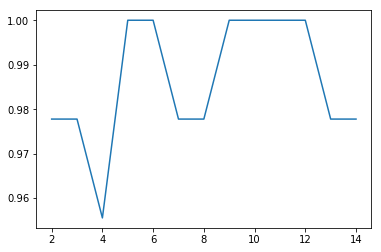

In [62]:
plt.plot(k,acc)

In [75]:
knn2 = KNeighborsClassifier(n_neighbors=10)
knn2.fit(X,Y)
X=iris.data
Y=iris.target

In [78]:
nueva_flor = [[5,3,1,0.5],[4.5,3.2,1.02,0.8]]

In [79]:
predecir = knn2.predict(nueva_flor)

In [80]:
predecir

array([0, 0])

In [82]:
clases = {0: 'setosa', 1: 'versicolor', 2:'virginica'}
print(clases[predecir[0]])
print(clases[predecir[1]])

setosa
setosa
